In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%%capture
%cd drive/MyDrive/genrecog/
%pip install speechbrain


In [3]:
from genrecog.preprocess.preprocessor import Preprocessor
from genrecog.nnet.CNN import Conv1d
from genrecog.tools.trainer import CNNFbankTrainer
import torch
from torch.utils.data import TensorDataset, DataLoader 
import datetime

torch.manual_seed(0)

In [4]:
# Load dataset

train_preprcessor = Preprocessor('dataset/npz_files/train.npz')
test_preprcessor = Preprocessor('dataset/npz_files/test.npz')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
X, y = train_preprcessor.as_shuffled_torch()
X_test, y_test = test_preprcessor.as_shuffled_torch()

dataset = TensorDataset(X.to(device), y.to(device))
validation_dataset, train_dataset = torch.utils.data.random_split(dataset, (400, 3200))
test_dataset = TensorDataset(X_test.to(device), y_test.to(device))

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=400)
validation_dataloader = DataLoader(validation_dataset, shuffle=True, batch_size=400)
test_dataloader = DataLoader(test_dataset, shuffle=True, batch_size=400)

In [6]:
# hidden_size = 128
# num_layers = 5
# input_size = 40
# output_dim = 10
# time_sequence = 702
lr = 0.001
model = Conv1d().to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
model

Conv1d(
  (batch_norm): BatchNorm1d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (input_layer): Sequential(
    (0): Conv1d(40, 128, kernel_size=(32,), stride=(1,), padding=(16,))
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (hidden_layer_1): Sequential(
    (0): Conv1d(128, 256, kernel_size=(32,), stride=(1,), padding=(16,))
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (hidden_layer_2): Sequential(
    (0): Conv1d(256, 512, kernel_size=(32,), stride=(1,), padding=(16,))
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool1d(

In [7]:
trainer = CNNFbankTrainer(
    model=model, 
    optimizer=optimizer, 
    loss=loss, 
    train_dataloader=train_dataloader, 
    validation_dataloader=validation_dataloader, 
    num_epochs=100)
trainer.train()

============================== EPOCH 1 =================================
Training accuracy 16.28
Training loss 2.5616
Validation accuracy 10.75
Validation loss 1459.1349
============================== EPOCH 2 =================================
Training accuracy 23.66
Training loss 2.2187
Validation accuracy 11.00
Validation loss 29.2271
============================== EPOCH 3 =================================
Training accuracy 27.03
Training loss 1.9612
Validation accuracy 16.50
Validation loss 5.6140
============================== EPOCH 4 =================================
Training accuracy 30.56
Training loss 1.8511
Validation accuracy 30.00
Validation loss 2.0269
============================== EPOCH 5 =================================
Training accuracy 33.09
Training loss 1.7702
Validation accuracy 41.00
Validation loss 1.5666
============================== EPOCH 6 =================================
Training accuracy 36.31
Training loss 1.6826
Validation accuracy 40.75
Validation loss 1

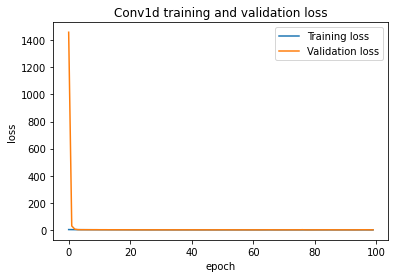

In [8]:
trainer.plot_loss("Conv1d training and validation loss")

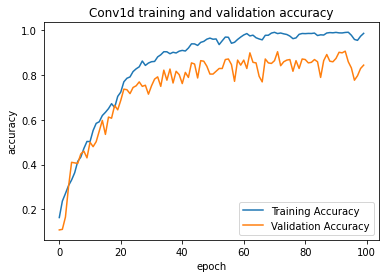

In [9]:
trainer.plot_accuracies("Conv1d training and validation accuracy")

In [10]:
trainer.eval(test_dataloader)

(tensor([4, 2, 6, 3, 0, 3, 3, 7, 9, 8, 0, 8, 2, 5, 0, 3, 9, 3, 9, 8, 5, 3, 3, 4,
         0, 2, 9, 6, 8, 1, 2, 4, 0, 6, 7, 2, 6, 5, 7, 8, 4, 7, 0, 2, 5, 8, 3, 2,
         6, 8, 0, 0, 5, 0, 7, 9, 0, 9, 0, 7, 0, 8, 1, 7, 1, 2, 4, 2, 0, 4, 0, 5,
         9, 3, 9, 8, 9, 5, 0, 1, 5, 2, 0, 0, 2, 8, 2, 4, 4, 9, 6, 1, 9, 6, 7, 5,
         0, 5, 7, 4, 4, 0, 6, 5, 4, 5, 4, 7, 3, 4, 9, 2, 8, 2, 8, 4, 0, 2, 6, 0,
         3, 0, 0, 4, 0, 6, 7, 9, 5, 9, 1, 0, 7, 4, 0, 5, 2, 0, 4, 2, 0, 6, 3, 3,
         2, 4, 2, 2, 9, 5, 2, 7, 5, 4, 3, 0, 8, 3, 9, 9, 4, 4, 3, 7, 0, 3, 8, 2,
         4, 0, 0, 2, 0, 5, 1, 9, 7, 0, 2, 6, 4, 6, 7, 0, 6, 6, 0, 0, 5, 2, 5, 5,
         7, 9, 8, 8, 9, 2, 8, 9, 9, 4, 7, 2, 5, 3, 4, 5, 6, 0, 5, 4, 9, 0, 3, 6,
         8, 6, 7, 2, 4, 7, 1, 7, 5, 9, 9, 6, 9, 0, 9, 7, 9, 5, 2, 0, 0, 9, 4, 0,
         3, 7, 6, 1, 6, 2, 2, 0, 7, 1, 6, 9, 8, 4, 2, 4, 0, 5, 2, 9, 4, 3, 0, 4,
         6, 0, 7, 4, 0, 5, 0, 0, 6, 8, 6, 5, 9, 6, 7, 5, 6, 6, 2, 8, 3, 8, 4, 4,
         6, 4, 9, 6, 3, 0, 4

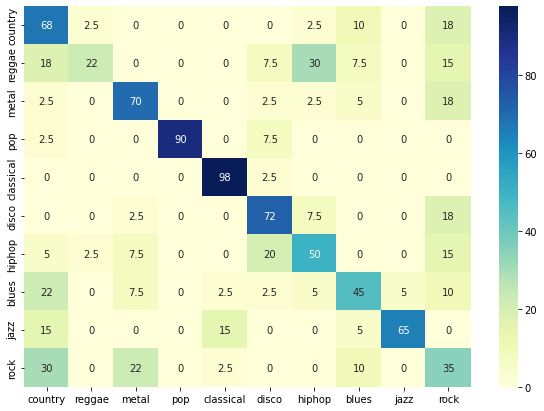

In [11]:
trainer.plot_confusion_matrix(test_dataloader)

In [12]:
trainer.classification_report(test_dataloader)

              precision    recall  f1-score   support

     country       0.42      0.68      0.51        40
      reggae       0.82      0.23      0.35        40
       metal       0.64      0.70      0.67        40
         pop       1.00      0.90      0.95        40
   classical       0.83      0.97      0.90        40
       disco       0.63      0.72      0.67        40
      hiphop       0.51      0.50      0.51        40
       blues       0.55      0.45      0.49        40
        jazz       0.93      0.65      0.76        40
        rock       0.27      0.35      0.31        40

    accuracy                           0.61       400
   macro avg       0.66      0.61      0.61       400
weighted avg       0.66      0.61      0.61       400



In [26]:
lr = 0.001
model_2 = Conv1d().to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=lr)
model_2

Conv1d(
  (batch_norm): BatchNorm1d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (input_layer): Sequential(
    (0): Conv1d(40, 128, kernel_size=(32,), stride=(1,), padding=(16,))
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (hidden_layer_1): Sequential(
    (0): Conv1d(128, 256, kernel_size=(32,), stride=(1,), padding=(16,))
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (hidden_layer_2): Sequential(
    (0): Conv1d(256, 512, kernel_size=(32,), stride=(1,), padding=(16,))
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool1d(

In [27]:
trainer_2 = CNNFbankTrainer(
    model=model_2, 
    optimizer=optimizer, 
    loss=loss, 
    train_dataloader=train_dataloader, 
    validation_dataloader=validation_dataloader, 
    num_epochs=60)
trainer_2.train()

============================== EPOCH 1 =================================
Training accuracy 13.16
Training loss 2.5925
Validation accuracy 10.75
Validation loss 1287.4127
============================== EPOCH 2 =================================
Training accuracy 18.31
Training loss 2.3402
Validation accuracy 12.25
Validation loss 42.7615
============================== EPOCH 3 =================================
Training accuracy 23.19
Training loss 2.0449
Validation accuracy 24.00
Validation loss 3.8706
============================== EPOCH 4 =================================
Training accuracy 28.12
Training loss 1.8914
Validation accuracy 28.25
Validation loss 1.9277
============================== EPOCH 5 =================================
Training accuracy 30.19
Training loss 1.8355
Validation accuracy 27.25
Validation loss 1.8616
============================== EPOCH 6 =================================
Training accuracy 33.00
Training loss 1.7601
Validation accuracy 39.75
Validation loss 1

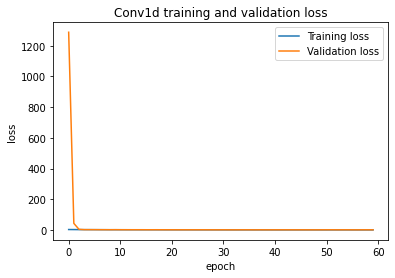

In [28]:
trainer_2.plot_loss("Conv1d training and validation loss")

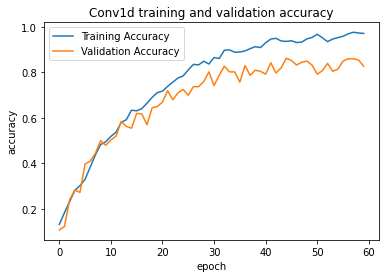

In [29]:
trainer_2.plot_accuracies("Conv1d training and validation accuracy")

In [30]:
trainer_2.eval(test_dataloader)

(tensor([1, 3, 6, 7, 3, 3, 9, 3, 8, 1, 3, 6, 8, 2, 2, 5, 2, 9, 5, 4, 2, 7, 6, 0,
         3, 2, 9, 8, 8, 8, 6, 0, 1, 9, 9, 3, 2, 9, 6, 1, 8, 4, 9, 9, 3, 4, 5, 9,
         8, 9, 6, 6, 1, 7, 9, 0, 2, 5, 9, 0, 0, 9, 4, 6, 3, 5, 8, 0, 1, 9, 4, 6,
         7, 2, 3, 2, 3, 5, 9, 2, 4, 6, 7, 0, 7, 7, 7, 0, 9, 9, 6, 2, 0, 4, 9, 1,
         2, 3, 1, 9, 4, 5, 2, 9, 9, 0, 1, 0, 2, 9, 9, 8, 0, 9, 4, 7, 9, 8, 2, 3,
         8, 0, 6, 1, 5, 2, 1, 2, 2, 6, 9, 3, 3, 9, 8, 2, 8, 1, 9, 7, 5, 7, 4, 3,
         6, 4, 8, 8, 9, 3, 4, 7, 9, 9, 5, 4, 5, 7, 4, 0, 2, 2, 1, 5, 9, 8, 1, 7,
         0, 9, 6, 6, 1, 2, 4, 6, 0, 2, 3, 1, 4, 6, 4, 7, 8, 0, 7, 5, 7, 7, 2, 3,
         4, 6, 2, 1, 4, 9, 3, 3, 2, 3, 7, 3, 0, 8, 5, 8, 0, 6, 7, 2, 5, 3, 2, 4,
         2, 9, 9, 1, 7, 9, 7, 2, 1, 7, 3, 2, 3, 2, 0, 9, 4, 6, 4, 8, 9, 6, 9, 3,
         7, 9, 7, 9, 4, 7, 6, 0, 2, 1, 5, 7, 2, 4, 9, 9, 1, 8, 7, 2, 9, 8, 2, 4,
         0, 9, 8, 9, 9, 2, 3, 2, 4, 0, 9, 9, 3, 2, 4, 5, 7, 2, 9, 7, 8, 1, 4, 8,
         8, 9, 1, 5, 4, 0, 0

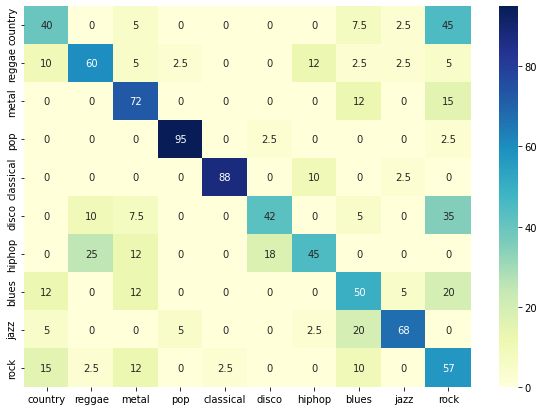

In [31]:
trainer_2.plot_confusion_matrix(test_dataloader)

In [32]:
trainer_2.classification_report(test_dataloader)

              precision    recall  f1-score   support

     country       0.48      0.40      0.44        40
      reggae       0.62      0.60      0.61        40
       metal       0.57      0.72      0.64        40
         pop       0.93      0.95      0.94        40
   classical       0.97      0.88      0.92        40
       disco       0.68      0.42      0.52        40
      hiphop       0.64      0.45      0.53        40
       blues       0.47      0.50      0.48        40
        jazz       0.84      0.68      0.75        40
        rock       0.32      0.57      0.41        40

    accuracy                           0.62       400
   macro avg       0.65      0.62      0.62       400
weighted avg       0.65      0.62      0.62       400

